## End-to-end Machine Learning project

### Setup

In [3]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np

In [4]:
def load_house_data():
    csv_path = "kc_house_data.csv"
    return pd.read_csv(csv_path)

### Data Structure

In [6]:
houses = load_house_data()
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


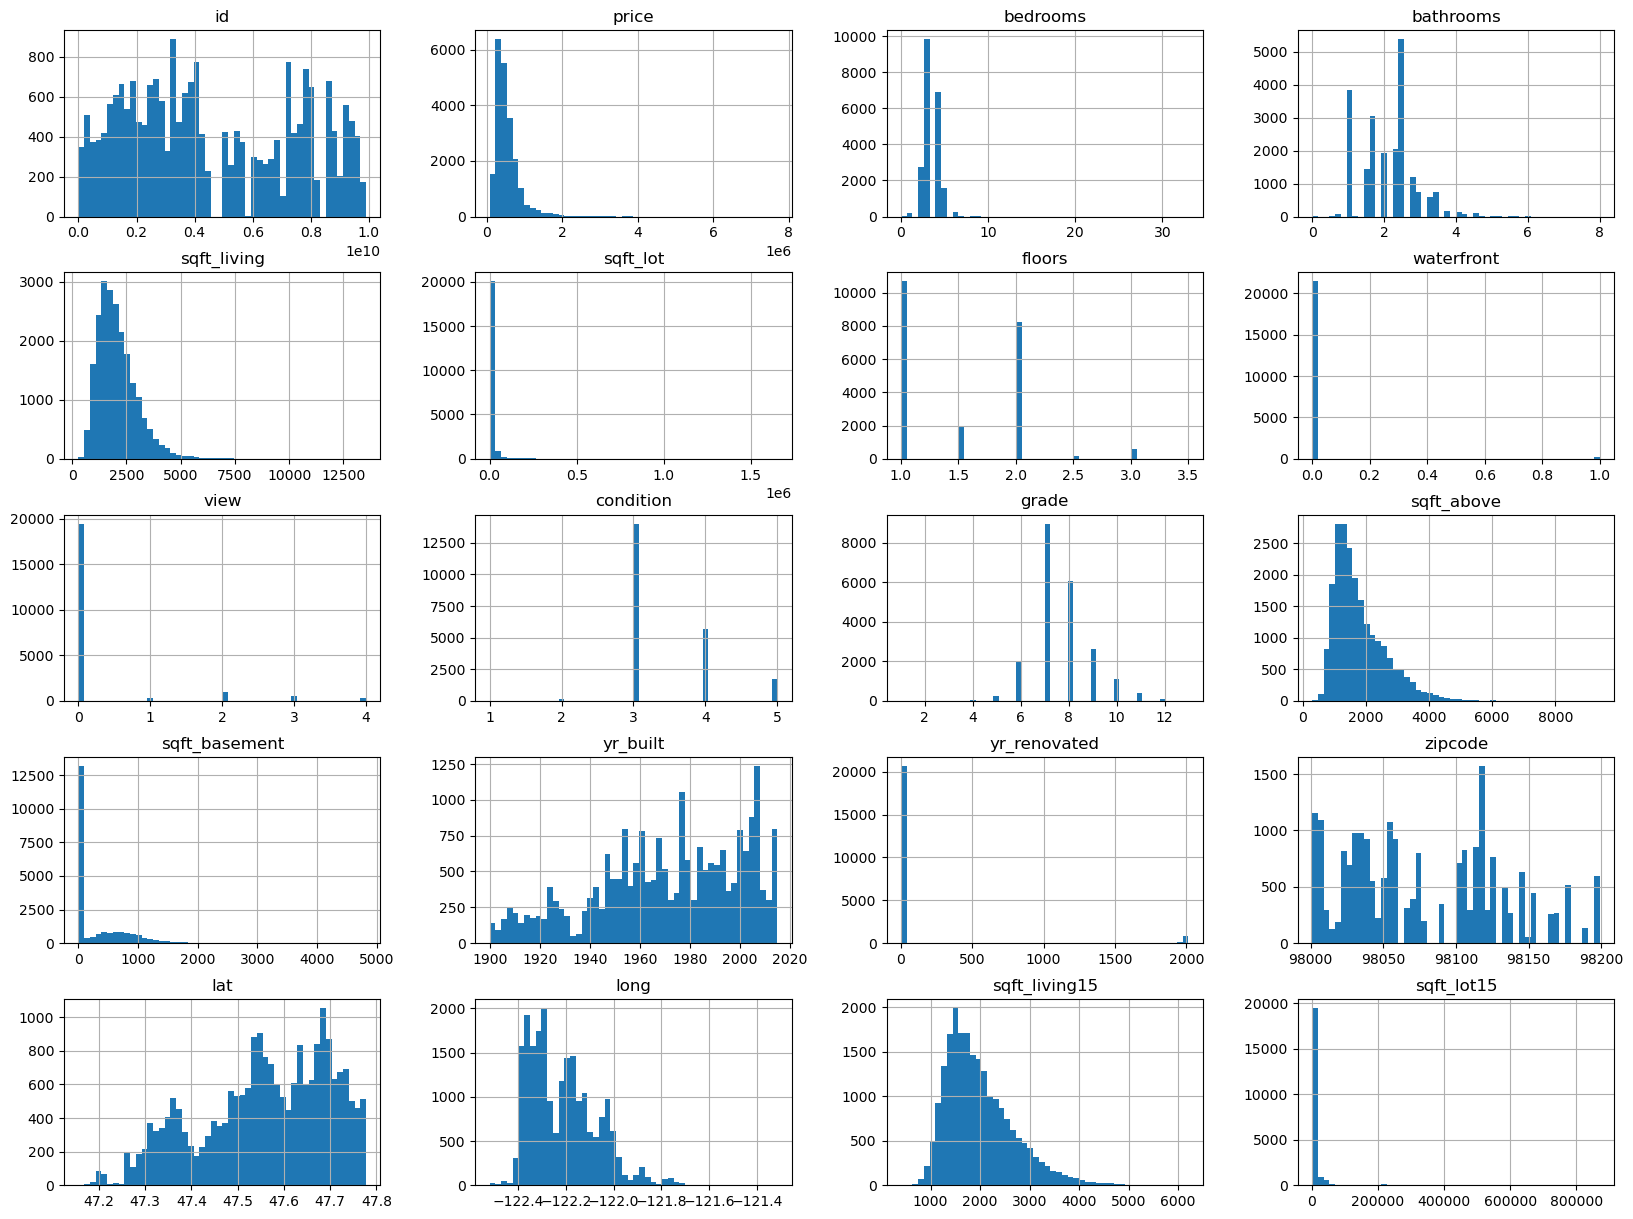

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
houses.hist(bins=50, figsize=(20,15))
plt.show()

### Test Set

In [11]:
np.random.seed(71)

In [12]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(houses, 0.2)
len(train_set)

17291

In [14]:
len(test_set)

4322

In [15]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
train_set, test_set = split_train_test_by_id(houses, 0.2, "id")

In [17]:
test_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
15,9297300055,20150124T000000,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
16,1875500060,20140731T000000,395000.0,3,2.00,1890,14040,2.0,0,0,...,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018
19,7983200060,20150424T000000,230000.0,3,1.00,1250,9774,1.0,0,0,...,7,1250,0,1969,0,98003,47.3343,-122.306,1280,8850


In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(houses, test_size=0.2, random_state=71)

<Axes: >

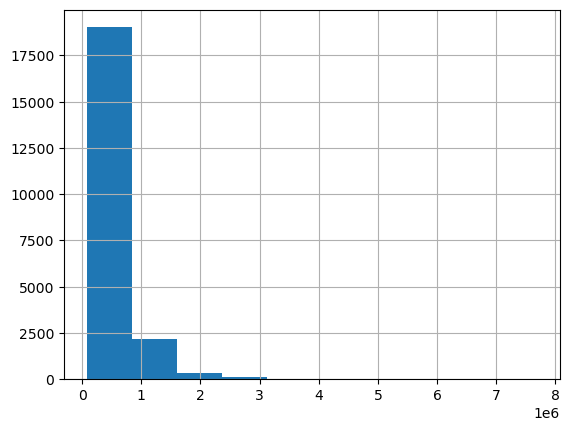

In [19]:
houses["price"].hist()

In [20]:
houses["price_cat"] = pd.cut(houses["price"],
                               bins=[0., 250000, 500000, 750000, 1000000, np.inf],
                               labels=[1, 2, 3, 4, 5])

In [21]:
houses["price_cat"].value_counts()

price_cat
2    10127
3     5472
1     2433
4     2116
5     1465
Name: count, dtype: int64

<Axes: >

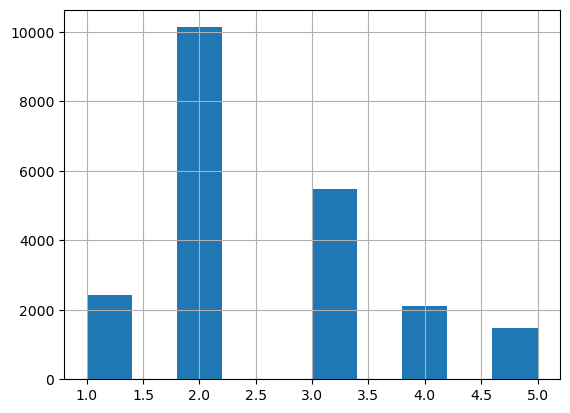

In [22]:
houses["price_cat"].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=71)
for train_index, test_index in split.split(houses, houses["price_cat"]):
    strat_train_set = houses.loc[train_index]
    strat_test_set = houses.loc[test_index]

In [24]:
strat_test_set["price_cat"].value_counts() / len(strat_test_set)

price_cat
2    0.468656
3    0.253065
1    0.112653
4    0.097849
5    0.067777
Name: count, dtype: float64

In [25]:
def price_cat_proportions(data):
    return data["price_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(houses, test_size=0.2, random_state=71)

compare_props = pd.DataFrame({
    "Overall": price_cat_proportions(houses),
    "Stratified": price_cat_proportions(strat_test_set),
    "Random": price_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
price_cat,,,,,
1,0.112571,0.112653,0.117280,4.182714,0.072943
2,0.468561,0.468656,0.470507,0.415315,0.020368
3,0.253181,0.253065,0.246819,-2.512676,-0.045799
4,0.097904,0.097849,0.099468,1.597404,-0.056507
5,0.067783,0.067777,0.065926,-2.739376,-0.009253


In [26]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("price_cat", axis=1, inplace=True)

### Discover and Visualize the Data

In [28]:
houses = strat_train_set.copy()

### Visualizing Geographical Data

<Axes: xlabel='long', ylabel='lat'>

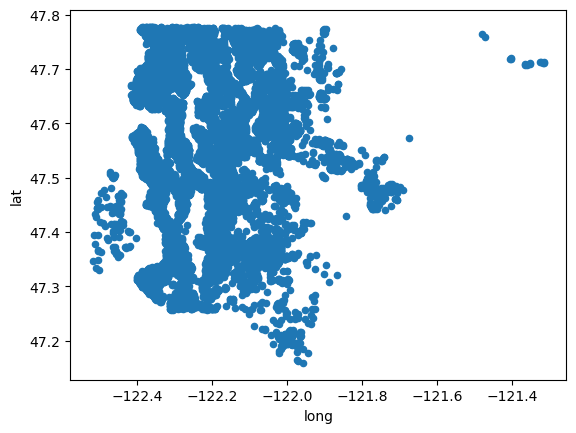

In [30]:
houses.plot(kind="scatter", x="long", y="lat")

![King County](KC.jpg)

<Axes: xlabel='long', ylabel='lat'>

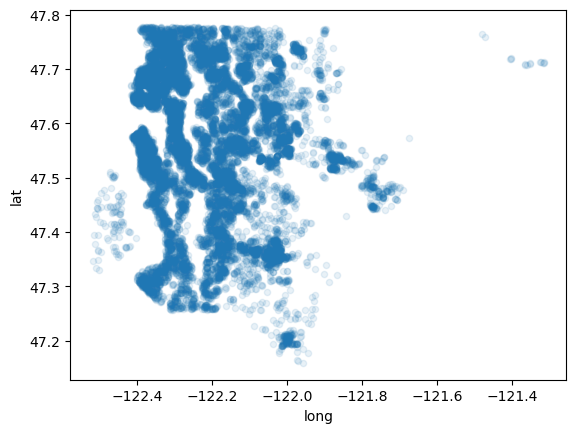

In [32]:
houses.plot(kind="scatter", x="long", y="lat", alpha=0.1)

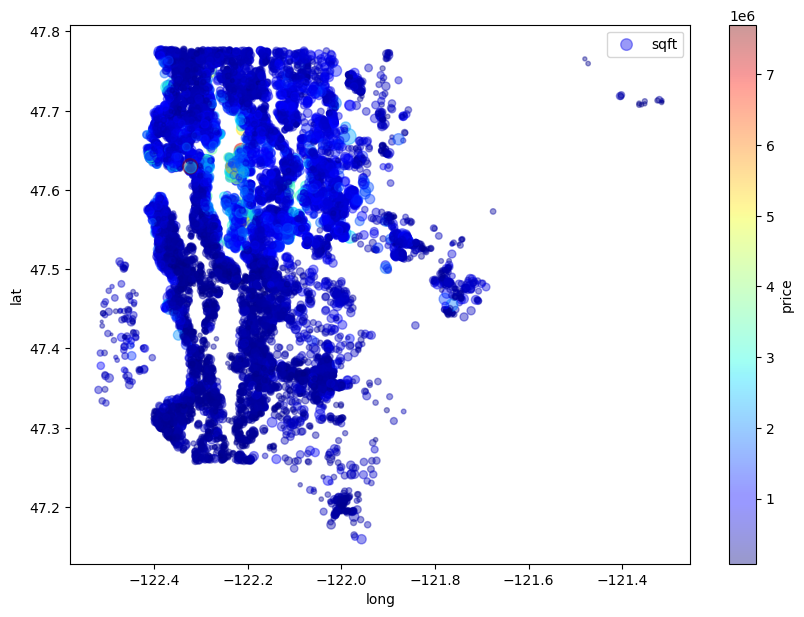

In [33]:
houses.plot(kind="scatter", x="long", y="lat", alpha=0.4,
             s=houses["sqft_living"]/100, label="sqft", figsize=(10,7),
             c="price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

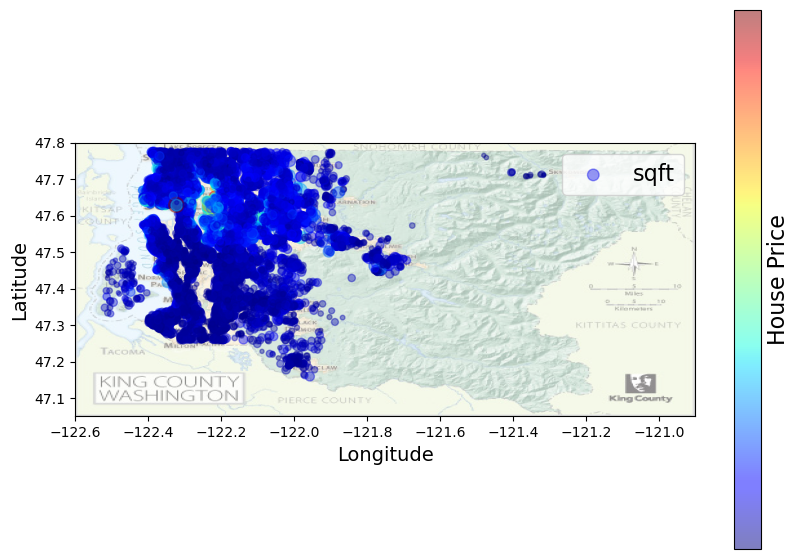

In [34]:
import matplotlib.image as mpimg
kc_img=mpimg.imread('KC.jpg')
ax = houses.plot(kind="scatter", x="long", y="lat", figsize=(10,7),
                  s=houses['sqft_living']/100, label="sqft",
                  c="price", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(kc_img, extent=[-122.6, -120.9, 47.05, 47.8], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = houses["price"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('House Price', fontsize=16)

plt.legend(fontsize=16)
plt.show()

### Correlations

In [36]:
corr_matrix = houses.select_dtypes(include=['int64', 'float64']).corr()

In [37]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.704679
grade            0.667851
sqft_above       0.605059
sqft_living15    0.586603
bathrooms        0.527349
view             0.401478
sqft_basement    0.333762
bedrooms         0.312817
lat              0.304072
waterfront       0.275743
floors           0.253594
yr_renovated     0.126681
sqft_lot         0.088617
sqft_lot15       0.086444
yr_built         0.054970
condition        0.032466
long             0.019704
id              -0.009957
zipcode         -0.048259
Name: price, dtype: float64

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='sqft_living', ylabel='price'>,
        <Axes: xlabel='bedrooms', ylabel='price'>,
        <Axes: xlabel='grade', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='sqft_living'>,
        <Axes: xlabel='sqft_living', ylabel='sqft_living'>,
        <Axes: xlabel='bedrooms', ylabel='sqft_living'>,
        <Axes: xlabel='grade', ylabel='sqft_living'>],
       [<Axes: xlabel='price', ylabel='bedrooms'>,
        <Axes: xlabel='sqft_living', ylabel='bedrooms'>,
        <Axes: xlabel='bedrooms', ylabel='bedrooms'>,
        <Axes: xlabel='grade', ylabel='bedrooms'>],
       [<Axes: xlabel='price', ylabel='grade'>,
        <Axes: xlabel='sqft_living', ylabel='grade'>,
        <Axes: xlabel='bedrooms', ylabel='grade'>,
        <Axes: xlabel='grade', ylabel='grade'>]], dtype=object)

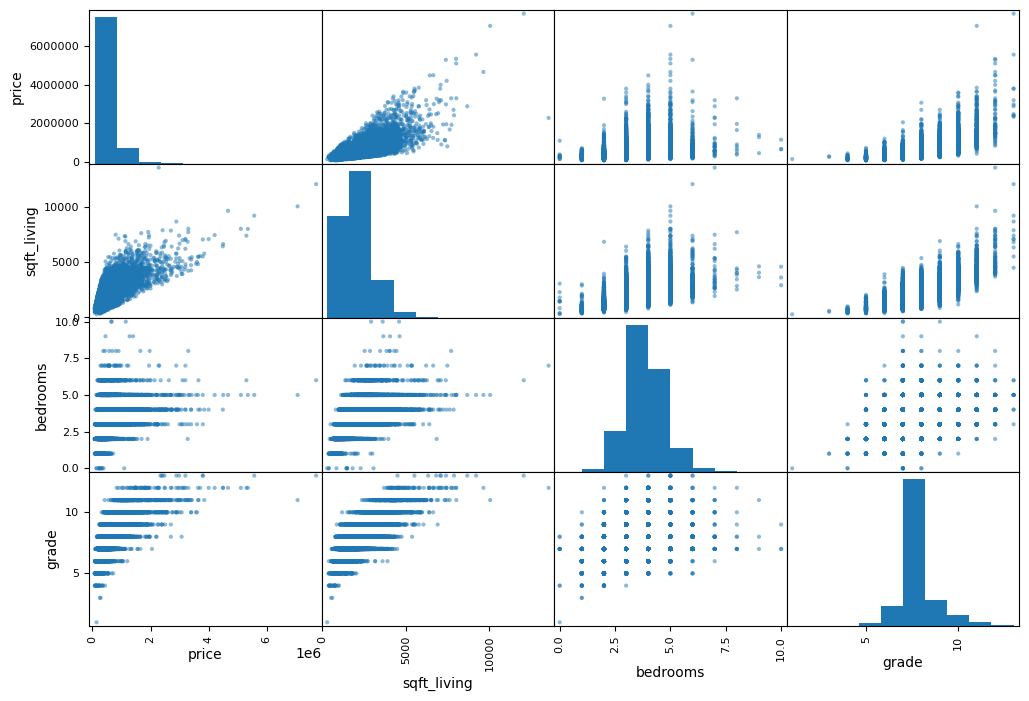

In [38]:
from pandas.plotting import scatter_matrix

attributes = ["price", "sqft_living", "bedrooms", "grade"]
scatter_matrix(houses[attributes], figsize=(12, 8))

## Prepare the Data for Machine Learning Algorithms

In [40]:
houses = strat_train_set.drop("price", axis=1)
houses_labels = strat_train_set["price"].copy()

In [41]:
sample_incomplete_rows = houses[houses.isnull().any(axis=1)].head()
sample_incomplete_rows

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [42]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [43]:
houses_num = houses.drop("date", axis=1)

In [44]:
imputer.fit(houses_num)

SimpleImputer(strategy='median')

In [45]:
imputer.statistics_

array([ 3.90499012e+09,  3.00000000e+00,  2.25000000e+00,  1.92000000e+03,
        7.62000000e+03,  1.50000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.00000000e+00,  7.00000000e+00,  1.56000000e+03,  0.00000000e+00,
        1.97500000e+03,  0.00000000e+00,  9.80650000e+04,  4.75715000e+01,
       -1.22229500e+02,  1.84000000e+03,  7.63500000e+03])

In [46]:
houses_num.median().values

array([ 3.90499012e+09,  3.00000000e+00,  2.25000000e+00,  1.92000000e+03,
        7.62000000e+03,  1.50000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.00000000e+00,  7.00000000e+00,  1.56000000e+03,  0.00000000e+00,
        1.97500000e+03,  0.00000000e+00,  9.80650000e+04,  4.75715000e+01,
       -1.22229500e+02,  1.84000000e+03,  7.63500000e+03])

In [47]:
X = imputer.transform(houses_num)
houses_tr = pd.DataFrame(X, columns=houses_num.columns,
                          index=houses.index)
houses_tr.loc[sample_incomplete_rows.index.values]

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [48]:
imputer.strategy

'median'

In [49]:
houses_tr = pd.DataFrame(X, columns=houses_num.columns,
                          index=houses_num.index)
houses_tr.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15734,6.758700e+09,3.0,2.00,1970.0,3420.0,2.0,0.0,3.0,5.0,8.0,1970.0,0.0,1913.0,0.0,98103.0,47.6762,-122.354,1770.0,3420.0
14429,3.579000e+09,3.0,2.25,2010.0,7447.0,2.0,0.0,0.0,3.0,8.0,2010.0,0.0,1985.0,0.0,98028.0,47.7470,-122.248,2230.0,7846.0
5388,6.851700e+09,4.0,2.00,2580.0,4500.0,2.0,0.0,0.0,4.0,9.0,1850.0,730.0,1905.0,0.0,98102.0,47.6245,-122.316,2590.0,4100.0
6834,8.563010e+09,3.0,1.75,1560.0,8968.0,1.0,0.0,0.0,4.0,8.0,1560.0,0.0,1972.0,0.0,98008.0,47.6243,-122.100,1990.0,8034.0
16024,8.682261e+09,2.0,1.75,1560.0,4500.0,1.0,0.0,0.0,3.0,8.0,1560.0,0.0,2004.0,0.0,98053.0,47.7128,-122.032,1860.0,4500.0


### Transformation Pipelines

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

houses_num_tr = num_pipeline.fit_transform(houses_num)
houses_num_tr

array([[ 0.75528463, -0.41205656, -0.15276824, ..., -0.99370973,
        -0.31890622, -0.35348495],
       [-0.34851423, -0.41205656,  0.17232258, ..., -0.2438536 ,
         0.34898263, -0.18503024],
       [ 0.7875687 ,  0.69439753, -0.15276824, ..., -0.72489338,
         0.87167826, -0.32760398],
       ...,
       [-0.99382245, -0.41205656,  1.14759503, ...,  1.03656111,
         0.45061789,  9.54492303],
       [-1.41093428, -0.41205656,  0.4974134 , ...,  0.06740743,
         1.35081592, -0.3336175 ],
       [-0.33217139,  0.69439753,  0.4974134 , ...,  2.52212513,
         0.01503821,  7.70638411]])

In [52]:
from sklearn.compose import ColumnTransformer

num_attribs = list(houses_num)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

houses_prepared = full_pipeline.fit_transform(houses)

## Select and Train a Model
### Training and Evaluating on the Training Set

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(houses_prepared, houses_labels)

some_data = houses.iloc[:5]
some_labels = houses_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [978390.96075808 678695.44531007 953282.49558777 527020.30094416
 470051.82691442]


In [55]:
print("Labels:", list(some_labels))

Labels: [812000.0, 500000.0, 935000.0, 450000.0, 579000.0]


In [56]:
from sklearn.metrics import mean_squared_error

houses_predictions = lin_reg.predict(houses_prepared)
lin_mse = mean_squared_error(houses_labels, houses_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

202599.3709520619

#### RMSE

In [58]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(houses_labels, houses_predictions)
lin_mae

126556.44662113953

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=71)
tree_reg.fit(houses_prepared, houses_labels)

DecisionTreeRegressor(random_state=71)

In [60]:
houses_predictions = tree_reg.predict(houses_prepared)
tree_mse = mean_squared_error(houses_labels, houses_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

8289.171666565051

### Better Evaluation Using Cross-Validation

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, houses_prepared, houses_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [63]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [168920.9109832  203514.94361018 207551.0697866  220092.41488556
 206592.62356507 168979.8145456  173598.09748675 186215.09000326
 172001.83549923 211245.14921364]
Mean: 191871.19495791013
Standard deviation: 18924.489601339454


In [64]:
lin_scores = cross_val_score(lin_reg, houses_prepared, houses_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [193628.23913036 210919.90624155 192597.11795552 213745.5936703
 188976.37058653 206559.6527658  198715.1366552  204698.93273034
 212633.12686447 208141.8623628 ]
Mean: 203061.5938962887
Standard deviation: 8508.93785698801


In [65]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=71)
forest_reg.fit(houses_prepared, houses_labels)

RandomForestRegressor(random_state=71)

In [66]:
houses_predictions = forest_reg.predict(houses_prepared)
forest_mse = mean_squared_error(houses_labels, houses_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

48690.3809969179

In [67]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, houses_prepared, houses_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [122197.1232292  139241.77612969 137204.38702126 138837.05456177
 115543.54233746 135029.95000522 121268.22704541 120646.41806423
 130402.13451805 137832.12958614]
Mean: 129820.27424984294
Standard deviation: 8576.105814101087


In [68]:
scores = cross_val_score(lin_reg, houses_prepared, houses_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean     203061.593896
std        8969.208032
min      188976.370587
25%      194899.963512
50%      205629.292748
75%      210225.395272
max      213745.593670
dtype: float64

In [69]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(houses_prepared, houses_labels)
houses_predictions = svm_reg.predict(houses_prepared)
svm_mse = mean_squared_error(houses_labels, houses_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

352084.54146789364

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=71)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(houses_prepared, houses_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=71),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [72]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=71)

In [73]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

190845.5050816588 {'max_features': 2, 'n_estimators': 3}
157076.51857615318 {'max_features': 2, 'n_estimators': 10}
148867.3120897818 {'max_features': 2, 'n_estimators': 30}
170947.11388612635 {'max_features': 4, 'n_estimators': 3}
148003.7918297488 {'max_features': 4, 'n_estimators': 10}
143130.50188715843 {'max_features': 4, 'n_estimators': 30}
165748.91734584217 {'max_features': 6, 'n_estimators': 3}
145587.58051912687 {'max_features': 6, 'n_estimators': 10}
137374.02808795436 {'max_features': 6, 'n_estimators': 30}
163119.33843866238 {'max_features': 8, 'n_estimators': 3}
142538.07505485212 {'max_features': 8, 'n_estimators': 10}
137423.5404543651 {'max_features': 8, 'n_estimators': 30}
179120.43656558148 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
152912.4393913627 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
174391.41465598816 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
151238.014560308 {'bootstrap': False, 'max_features': 3, 'n_estima

In [74]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.432786,0.045130,0.005623,0.000694,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.703538e+10,-4.115172e+10,...,-3.642201e+10,2.634533e+09,18,-9.255347e+09,-9.827614e+09,-9.825265e+09,-9.511436e+09,-1.055139e+10,-9.794210e+09,4.349097e+08
1,1.252142,0.129658,0.044148,0.037412,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.810337e+10,-2.712435e+10,...,-2.467303e+10,3.494301e+09,11,-4.717892e+09,-4.438000e+09,-4.352816e+09,-4.510080e+09,-4.660079e+09,-4.535773e+09,1.358767e+08
2,4.024650,1.204184,0.178936,0.033444,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.404573e+10,-2.301497e+10,...,-2.216148e+10,2.727619e+09,8,-3.474851e+09,-3.425235e+09,-3.511376e+09,-3.520430e+09,-3.527597e+09,-3.491898e+09,3.795396e+07
3,0.525781,0.031547,0.019715,0.028704,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.272779e+10,-2.940161e+10,...,-2.922292e+10,2.636447e+09,14,-8.371051e+09,-7.973787e+09,-8.451567e+09,-7.833586e+09,-8.027612e+09,-8.131521e+09,2.384308e+08
4,1.634136,0.040167,0.057026,0.036110,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.434454e+10,-2.113752e+10,...,-2.190512e+10,1.986332e+09,7,-4.302895e+09,-3.831322e+09,-4.002739e+09,-3.860598e+09,-4.014133e+09,-4.002338e+09,1.672186e+08
5,5.180524,0.324107,0.142462,0.038061,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.416476e+10,-2.018929e+10,...,-2.048634e+10,2.698614e+09,4,-3.174058e+09,-3.067999e+09,-3.128647e+09,-3.268158e+09,-3.078052e+09,-3.143383e+09,7.304479e+07
6,0.664149,0.037568,0.034717,0.036294,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.067967e+10,-2.813171e+10,...,-2.747270e+10,2.400100e+09,13,-7.668094e+09,-6.709695e+09,-7.719478e+09,-6.554728e+09,-7.914422e+09,-7.313283e+09,5.642656e+08
7,2.319161,0.147484,0.058452,0.037388,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.283460e+10,-2.278905e+10,...,-2.119574e+10,1.750741e+09,6,-3.863655e+09,-3.458035e+09,-3.873907e+09,-3.521827e+09,-3.876923e+09,-3.718869e+09,1.880643e+08
8,6.936971,0.221818,0.159061,0.039668,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.234970e+10,-1.909860e+10,...,-1.887162e+10,2.403464e+09,1,-2.932448e+09,-2.687936e+09,-2.997691e+09,-2.871278e+09,-2.877751e+09,-2.873421e+09,1.033006e+08
9,0.918403,0.072042,0.005163,0.000654,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-2.942711e+10,-2.904834e+10,...,-2.660792e+10,3.021156e+09,12,-6.738966e+09,-7.324426e+09,-6.429665e+09,-5.993707e+09,-7.316175e+09,-6.760588e+09,5.147182e+08


In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=71)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=71)
rnd_search.fit(houses_prepared, houses_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=71),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8781ab4ed0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f878269fa10>},
                   random_state=71, scoring='neg_mean_squared_error')

In [76]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

138441.657015112 {'max_features': 4, 'n_estimators': 174}
140438.36120676438 {'max_features': 4, 'n_estimators': 56}
162190.25491674631 {'max_features': 1, 'n_estimators': 41}
141508.3144696433 {'max_features': 3, 'n_estimators': 81}
140208.96252063772 {'max_features': 3, 'n_estimators': 167}
148623.41036870526 {'max_features': 2, 'n_estimators': 31}
148003.7918297488 {'max_features': 4, 'n_estimators': 10}
158190.632156237 {'max_features': 1, 'n_estimators': 128}
157541.2975246328 {'max_features': 1, 'n_estimators': 156}
135465.96358310978 {'max_features': 6, 'n_estimators': 177}


In [77]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.01192094, 0.00411488, 0.03670536, 0.2193626 , 0.0184261 ,
       0.00335857, 0.02815963, 0.02499203, 0.00467268, 0.20610326,
       0.08691748, 0.02517125, 0.0310396 , 0.00412672, 0.02442681,
       0.13054381, 0.06160098, 0.06086051, 0.0174968 ])

In [78]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("price", axis=1)
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [79]:
final_rmse

124100.01561779316

In [80]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([112315.03553709, 134859.03953749])

#### Exercise 1
Try a Support Vector Machine regressor (sklearn.svm.SVR) with various hyperparameters, such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don’t worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

The best model achieves the following score (evaluated using 5-fold cross validation):

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(housing_prepared, housing_labels)

In [ ]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

That's much worse than the RandomForestRegressor. Let's check the best hyperparameters found:

In [ ]:
grid_search.best_params_

#### Excercise 2
Try replacing GridSearchCV with RandomizedSearchCV.

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 20000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=1, cv=2, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=71)
rnd_search.fit(houses_prepared, houses_labels)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


RandomizedSearchCV(cv=2, estimator=SVR(), n_iter=1, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f877a5a2410>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f877a5a1610>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=71, scoring='neg_mean_squared_error',
                   verbose=2)

In [95]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

233858.54400532256

In [97]:
rnd_search.best_params_

{'C': 72.07021540991013, 'gamma': 0.4887368910816826, 'kernel': 'linear'}

#### Exercise 3
Try adding a transformer in the preparation pipeline to select only the 
most important attributes.


In [99]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

#### Number of top features:

In [115]:
k = 5

In [110]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.21936259780993886, 'grade'),
 (0.036705360885044176, 'bedrooms'),
 (0.011920942549475677, 'price'),
 (0.004114878268469858, 'sqft_living')]

#### A new pipeline that runs the previously defined preparation pipeline, and adds top k feature selection:

In [117]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])
houses_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(houses)

#### Features of the first 3 instances:

In [119]:
houses_prepared_top_k_features[0:3]

array([[-0.12423663,  0.28978845,  0.21537172,  0.83934169, -0.99370973],
       [-0.08099548,  0.28978845,  0.26349013,  1.35058768, -0.2438536 ],
       [ 0.53519078,  1.1377225 ,  0.07101648,  0.46601658, -0.72489338]])

In [121]:
houses_prepared[0:3, top_k_feature_indices]

array([[-0.12423663,  0.28978845,  0.21537172,  0.83934169, -0.99370973],
       [-0.08099548,  0.28978845,  0.26349013,  1.35058768, -0.2438536 ],
       [ 0.53519078,  1.1377225 ,  0.07101648,  0.46601658, -0.72489338]])

#### Excercise 4
Try creating a single pipeline that does the full data preparation plus the 
final prediction.

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])
prepare_select_and_predict_pipeline.fit(houses, houses_labels)

In [ ]:
some_data = houses.iloc[:4]
some_labels = houses_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

#### Excercise 5
Automatically explore some preparation options using GridSearchCV.

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(houses, houses_labels)

In [ ]:
grid_search_prep.best_params_